# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [10]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('./data/cars_hw.csv',low_memory=False)

In [11]:
df.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


In [12]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: >

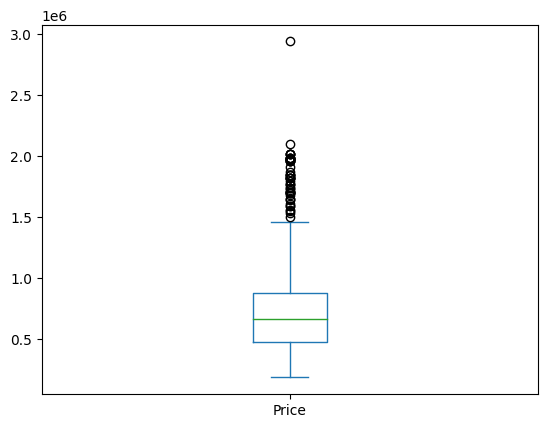

In [13]:
df['Price'].plot.box()

In [14]:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

/tmp/ipykernel_629908/1621900709.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
/tmp/ipykernel_629908/1621900709.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


<Axes: >

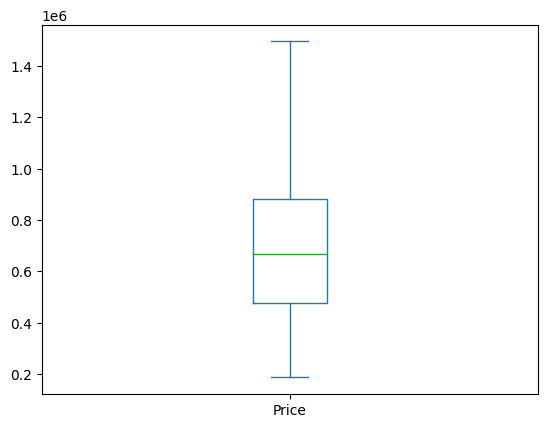

In [15]:
df['Price']=windsorize(df['Price'])
df['Price'].plot.box()

  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [16]:
df['Price'].describe()

count    9.760000e+02
mean     7.220832e+05
std      3.114130e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      1.493875e+06
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

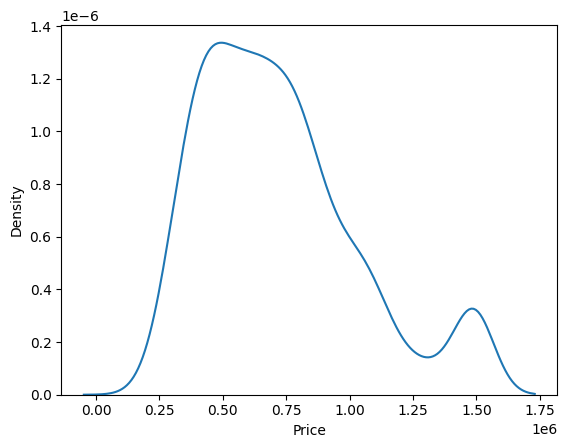

In [17]:
sns.kdeplot(data=df,x='Price')

In [18]:
df['Price'].groupby(by=df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,246606.366503,267000.0,288500.00,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,10503.967504,279000.0,284500.00,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,140927.699605,290000.0,635000.00,707500.0,787000.0,1066000.0
Honda,73.0,7.983818e+05,264893.305869,316000.0,581000.00,785000.0,915000.0,1493875.0
Hyundai,305.0,6.910783e+05,276437.697587,248000.0,485000.00,638000.0,837000.0,1493875.0
Jeep,4.0,1.442906e+06,101937.500000,1290000.0,1442906.25,1493875.0,1493875.0,1493875.0
Kia,8.0,1.478266e+06,44149.979650,1369000.0,1493875.00,1493875.0,1493875.0,1493875.0
MG Motors,35.0,1.493875e+06,0.000000,1493875.0,1493875.00,1493875.0,1493875.0,1493875.0
Mahindra,18.0,1.100167e+06,175549.305961,796000.0,1037000.00,1094500.0,1157000.0,1465000.0


/tmp/ipykernel_629908/3134518745.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='Price',hue='Make')


<Axes: xlabel='Price', ylabel='Density'>

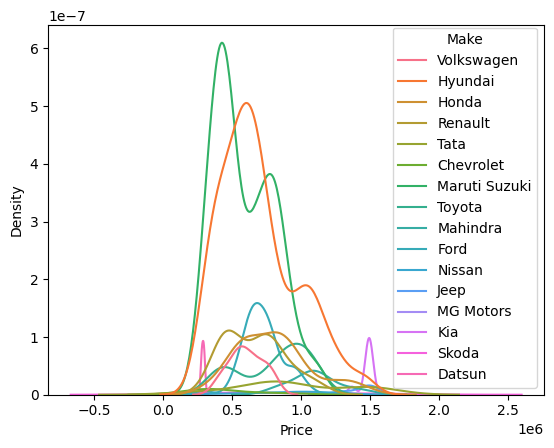

In [19]:
sns.kdeplot(data=df,x='Price',hue='Make')

Car prices are generally centered around the 500000 price point, with not as many cars above or below that point. The most expensive cars are MG motors, as there is a relatively large spike around 1500000.

  3. Split the data into an 80% training set and a 20% testing set.

In [20]:
y = df['Price']
print(y.describe())
X = df.drop('Price',axis=1)
X.head()

count    9.760000e+02
mean     7.220832e+05
std      3.114130e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      1.493875e+06
Name: Price, dtype: float64


,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual


In [21]:
## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

0.3147891696609386


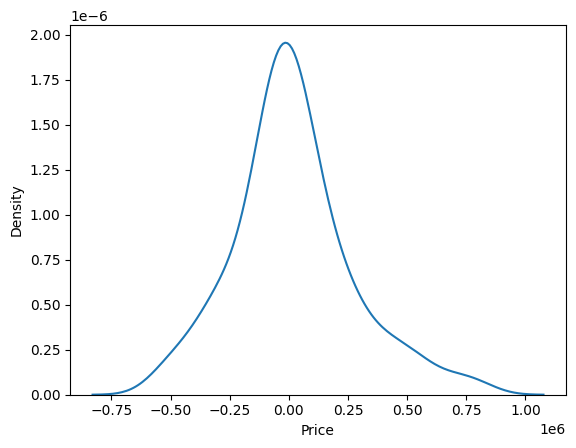

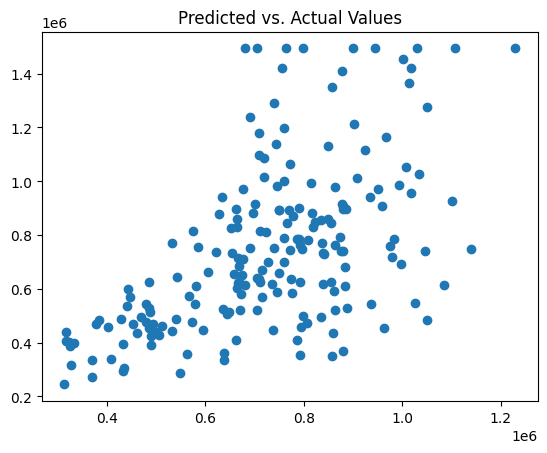

0.319903881385706
252803.4688838811


In [22]:
##Splitting Up into only numerical
X_train1=X_train[['Make_Year','Mileage_Run','Seating_Capacity']]
X_test1=X_test[['Make_Year','Mileage_Run','Seating_Capacity']]

## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures
# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train1) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test1) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(R2_lm)
print(RMSE_lm)

In [23]:
dummies = pd.get_dummies(df[['Make','Color','Body_Type','No_of_Owners','Fuel_Type','Transmission','Transmission_Type']])
# df.head()
#dummies.head()

In [24]:
df= df.drop(['Make','Color','Body_Type','No_of_Owners','Fuel_Type','Transmission','Transmission_Type'],axis=1)
df.head()
df = pd.concat([df, dummies], axis=1)

In [25]:
df.head()

,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,2017,44611,5,657000,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,2016,20305,5,682000,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,2019,29540,5,793000,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2017,35680,5,414000,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2017,25126,5,515000,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [26]:
y = df['Price']
X = df.drop('Price',axis=1)
X.head()

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)
X_train.head()

X_train2=X_train.drop(['Make_Year', 'Mileage_Run','Seating_Capacity'], axis=1)
X_test2=X_test.drop(['Make_Year', 'Mileage_Run','Seating_Capacity'], axis=1)

# ##Creating categorical train/test set
# # With Pandas, if you don't like booleans:
# X_train2 = pd.get_dummies(X_train[['Make','Color','Body_Type','No_of_Owners','Fuel_Type','Transmission','Transmission_Type']])
# X_test2 = pd.get_dummies(X_test[['Make','Color','Body_Type','No_of_Owners','Fuel_Type','Transmission','Transmission_Type']])
# X_train2.head()

0.6426128931175304


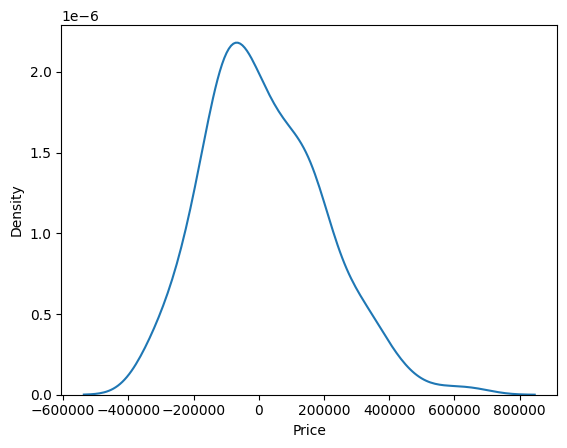

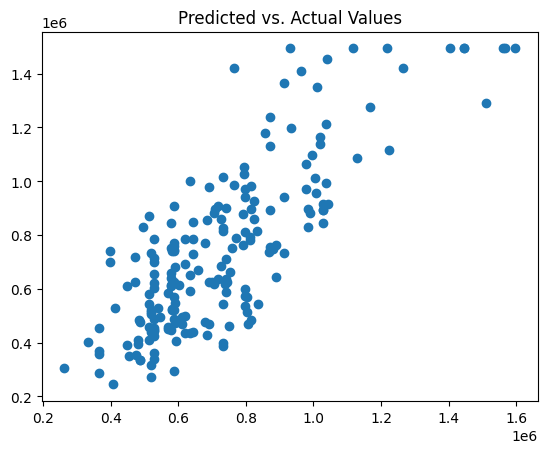

0.6452805859573356
182574.60088615774


In [27]:
##running on only categorical

## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train2, y_train) # Fit the linear model
print(reg.score(X_test2, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test2)
residuals_lm = y_test- y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS


print(R2_lm)
print(RMSE_lm)

In [28]:
#df = pd.concat([df, dummies], axis=1)
# X_train_lm = pd.concat([X_train_lm,X_train2],axis=1)
# X_test_lm = pd.concat([X_test_lm,X_test2],axis=1)
# X_trainlm.set_index('key').join(other.set_index('key'))
#X_train_lm=pd.concat([X_train_lm,X_train2],axis=1)

I couldn't find a way to merge the explanded numerical regressors with the one hot encoded categorical variables, so I will just run the regression using the numerical variables and the one hot encoded categorical variables.

In [29]:
df.head()

,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,2017,44611,5,657000,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,2016,20305,5,682000,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,2019,29540,5,793000,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2017,35680,5,414000,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2017,25126,5,515000,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


0.8076029405070122


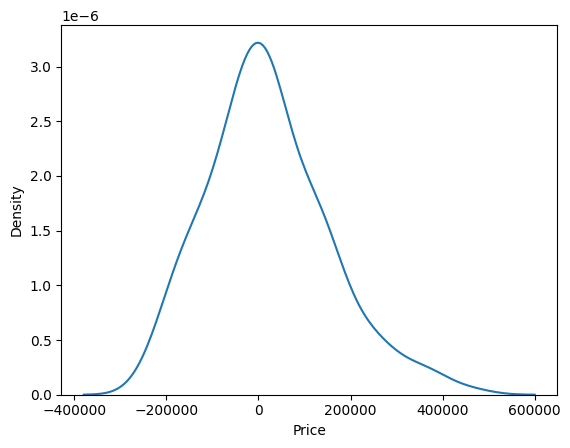

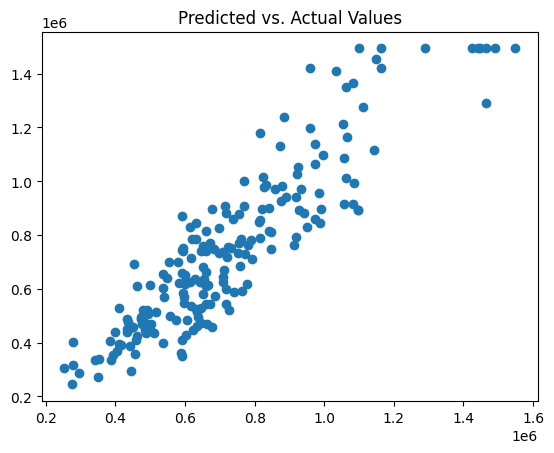

0.8090390758575183
133958.45642779666


In [30]:
y = df['Price']
X = df.drop('Price',axis=1)

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)


# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS


print(R2_lm)
print(RMSE_lm)

The most accurate predictor was the combined dataset. Only numerical had an r^2 of 0.32 and an RMSE of 252803, only categorical had an r^2 of 0.64 and an RMSE of 82574, while the combined had an R^2 of 0.80 and an RMSE of 133958.

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

-6431.688088618302


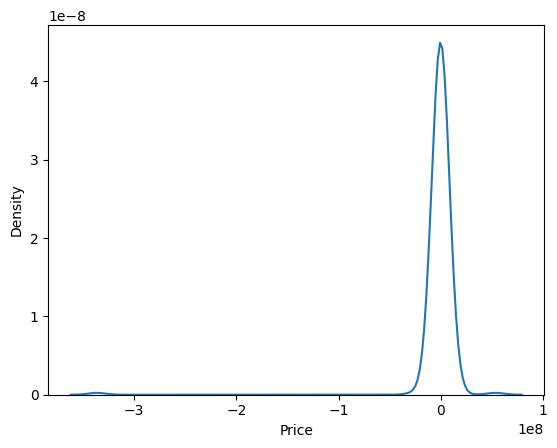

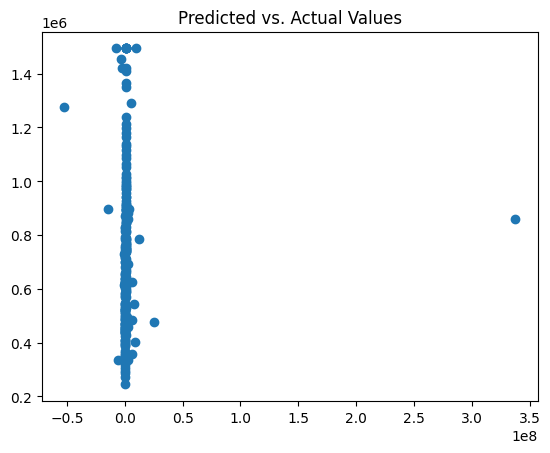

-6383.671706313972
24494420.339545064


In [31]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

y = df['Price']
X = df.drop('Price',axis=1)

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(R2_lm)
print(RMSE_lm)

Expanding the data set does not help the R^2 or the RMSE values. Even just expanding the set to a degree of 2 makes the R^2 negative. The best model is still the model I found in part 3.

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

0.8076029405070122


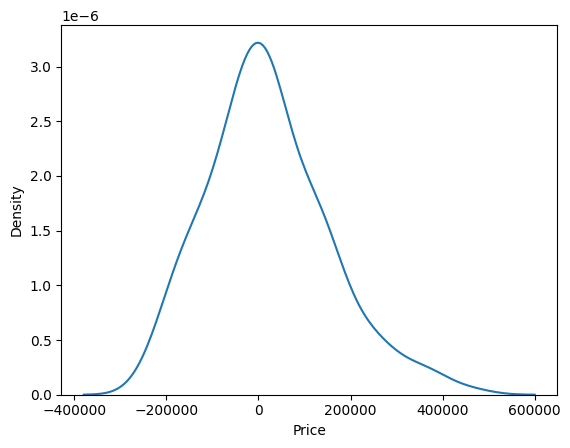

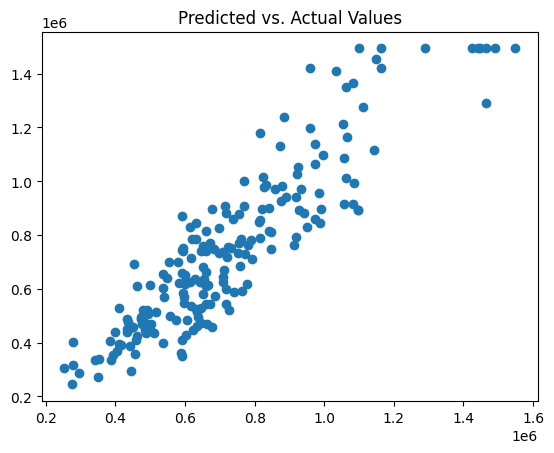

0.8090390758575183
133958.45642779666


In [32]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

y = df['Price']
X = df.drop('Price',axis=1)

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(R2_lm)
print(RMSE_lm)

The values do roughly line up on the diagonal of the predicted vs actual values graph. The kernel density plot of the residuals does roughly resemble a bell curve. If anything, the error is more positive than negative, meaning the predicted is larger than the actual value, which results in a slightly more shallow slope than a perfect slope of 1.

  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

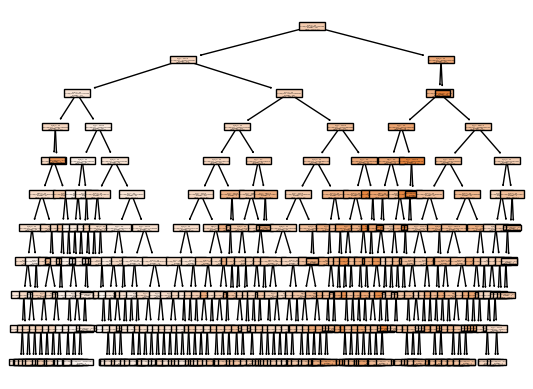

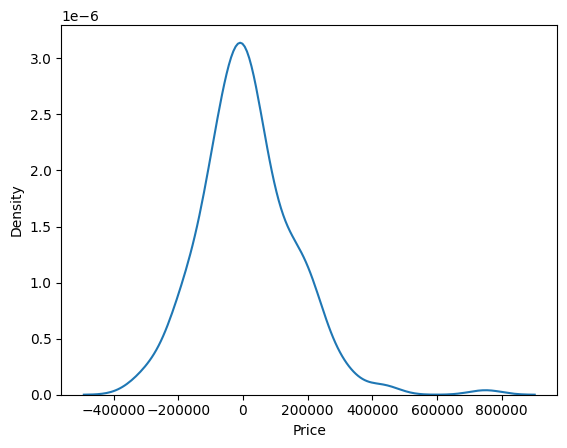

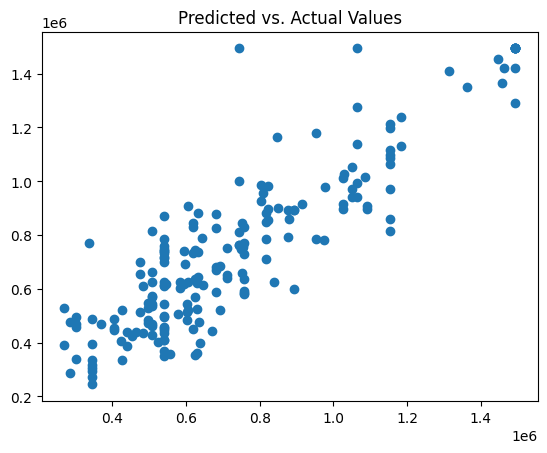

0.7726326365490229
146171.2441856266


In [33]:
## Decision Trees sample code:
from sklearn import tree 

model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print(R2_cart)
print(RMSE_cart)

The tree that I found gives the best R^2 and RMSE values is the tree with a max depth of 10. The R^2 is 0.78 and the RMSE is 143320. Increasing the depth past this decreases R^2.

  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

The error density doe look roughly bell shaped, with a slightly larger right tail. This is reflected in the predicted vs real plot, as there is a slightly shallower slope than a perfect slope of 1. This menas on average, the values predicted are larger than the real values.

  9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

The linear model performs better on the test set, but it is very close, only a difference in R^2 values of 0.03.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  

In [47]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('./data/wages_hw.csv',low_memory=False)

In [48]:
df.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,2,3.4,10000+ employees,Health Care,87.5,MD
2,3,4.8,501 to 1000 employees,Business Services,85.0,FL
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,5,2.9,51 to 200 employees,Business Services,114.5,NY


In [49]:
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Rating,Size,Sector,avg_salary,job_state
0,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,3.4,10000+ employees,Health Care,87.5,MD
2,4.8,501 to 1000 employees,Business Services,85.0,FL
3,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,2.9,51 to 200 employees,Business Services,114.5,NY


In [50]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       116
51 to 200 employees         92
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      2
Name: Size, dtype: int64

In [51]:
idx = df[ (df['Size'] == 'Unknown') ].index
df.drop(idx , inplace=True)

In [53]:
df['Sector'].value_counts()

Information Technology                176
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
Non-Profit                              9
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry                  1
-1                                

In [54]:
idx = df[ (df['Sector'] == '-1') ].index
df.drop(idx , inplace=True)

In [59]:
y = df['avg_salary']
X = df.drop('avg_salary',axis=1)
X.head()

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 

-4.247757089597526e+25


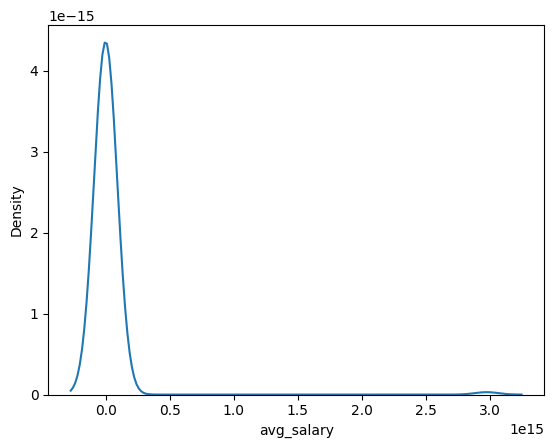

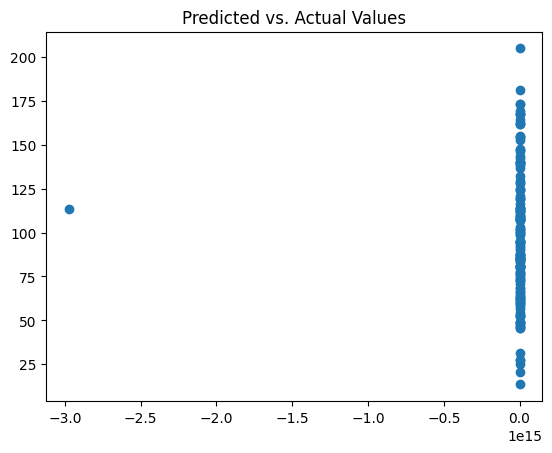

-4.226188214819631e+25
246270642830935.94


In [69]:
X1=pd.get_dummies(X['Sector'])

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(R2_lm)
print(RMSE_lm)

The R^2 of this test set is -4.2 and the RMSE is massive, this is a terribly fit model, I may have done soemething wrong, but I'm guessing because there were so many different sectors, some of which only ahd one or two data points in them, its impossible to train the data effectively.

  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  

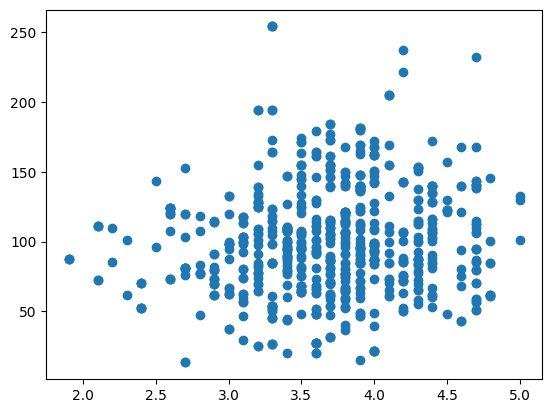

In [71]:
plt.scatter(x=df['Rating'],y=df['avg_salary'])
plt.show()

There is no obvious visual relationship between the two variables.

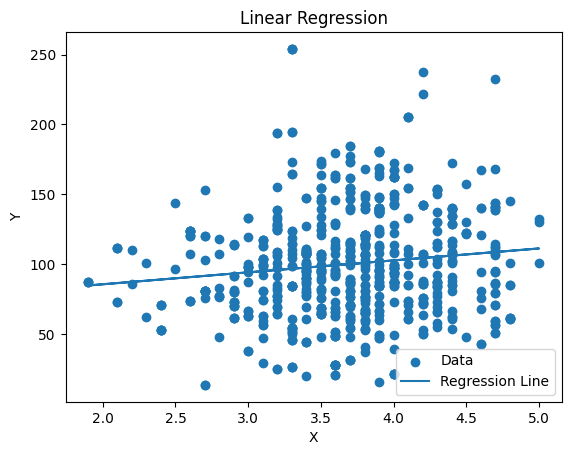

In [84]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

reg = slr(x,y)

plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')
plt.show()

I guess you could conclude that higher ratings lead to higher salaries.

In [85]:
ddf = pd.get_dummies(X)
ddf.head()

,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


0.023768510280295696


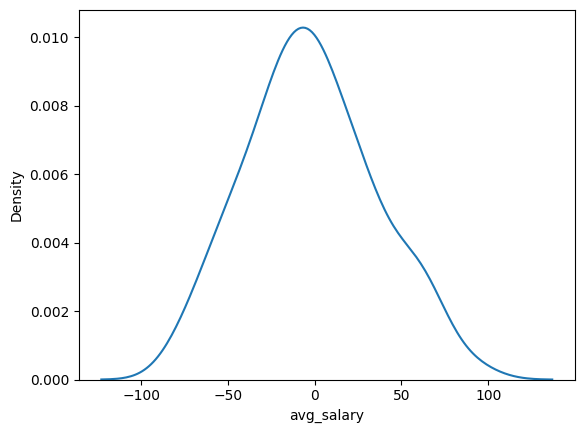

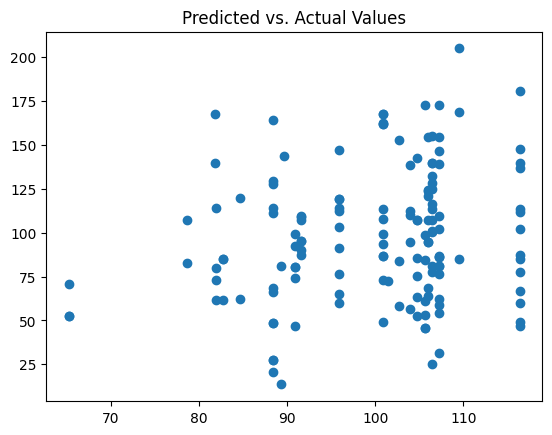

0.028725529787735904
37.33440320496945


In [86]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ddf, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(R2_lm)
print(RMSE_lm)

The R^2 value for the categorical regression is just above 0, I could not calculate R^2 or RMSE for the single linear regression but I would expect it to be similar in effectiveness. The slope of the regression line was just above 0, and I think the graph of the residuals would resemble a bell curve just like the categorical regression graph does.

  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  

In [93]:
x5=pd.concat([ddf,X1],axis=1)

-2.555553960122141e+25


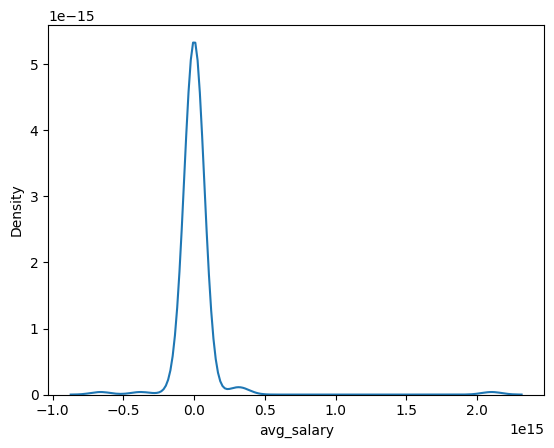

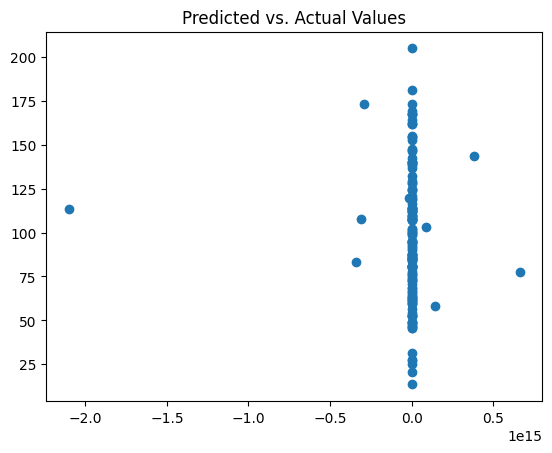

-2.5425776005536966e+25
191018458060372.62


In [99]:
x5.columns = x5.columns.astype(str)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x5, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(R2_lm)
print(RMSE_lm)

5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  

In [102]:
x=df.drop('avg_salary',axis=1)
y=df['avg_salary']

from sklearn.linear_model import LinearRegression # Import linear regression model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(R2_lm)
print(RMSE_lm)

ValueError: could not convert string to float: '501 to 1000 employees'

6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  

7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
 

 8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?